<a href="https://colab.research.google.com/github/hersheythings/machine_learning_portfolio/blob/main/ETH_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/test/export-EtherPrice.csv", index_col="Date(UTC)")
data

,UnixTimeStamp,Value
Date(UTC),,
7/30/2015,1438214400,0.00
7/31/2015,1438300800,0.00
8/1/2015,1438387200,0.00
8/2/2015,1438473600,0.00
8/3/2015,1438560000,0.00
...,...,...
1/28/2021,1611792000,1330.78
1/29/2021,1611878400,1379.13
1/30/2021,1611964800,1379.35


In [70]:
price = pd.DataFrame(data["Value"])
price

,Value
Date(UTC),
7/30/2015,0.00
7/31/2015,0.00
8/1/2015,0.00
8/2/2015,0.00
8/3/2015,0.00
...,...
1/28/2021,1330.78
1/29/2021,1379.13
1/30/2021,1379.35


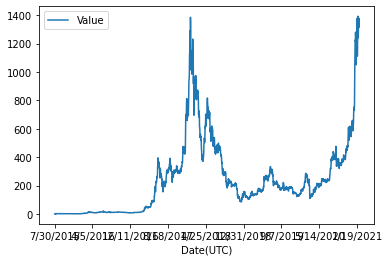

In [71]:
price.plot()

In [74]:
price.rename(columns={"Value":"Price"}, inplace=True)
price

,Price
Date(UTC),
7/30/2015,0.00
7/31/2015,0.00
8/1/2015,0.00
8/2/2015,0.00
8/3/2015,0.00
...,...
1/28/2021,1330.78
1/29/2021,1379.13
1/30/2021,1379.35


In [81]:
price['Value_30d_rolMean'] = price['Price'].rolling(30).mean()
price['Value_30d_Std'] = price['Price'].rolling(30).std() #Value가 정규분포를 따른다고 가정
price.iloc[2000:]

,Price,Value_30d_rolMean,Value_30d_Std
Date(UTC),,,
1/19/2021,1367.65,963.910667,266.283673
1/20/2021,1377.75,989.572333,267.882283
1/21/2021,1111.49,1005.381000,260.257696
1/22/2021,1234.56,1027.024667,250.946312
1/23/2021,1234.10,1047.750667,240.993684
1/24/2021,1392.45,1073.271333,235.354832
1/25/2021,1318.47,1096.018000,224.362704
1/26/2021,1368.22,1118.826000,215.641188
1/27/2021,1241.51,1135.890000,203.702270


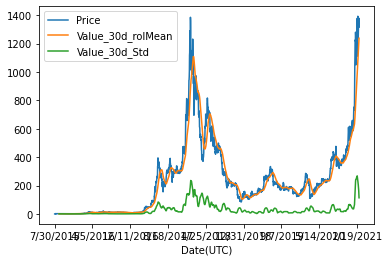

In [82]:
price.plot()

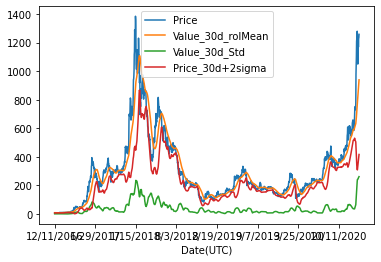

In [88]:
price['Price_30d+2sigma'] = price.apply(lambda x: x['Value_30d_rolMean'] + 2*x['Value_30d_Std'], axis =1)
price['Price_30d+2sigma'] = price.apply(lambda x: x['Value_30d_rolMean'] - 2*x['Value_30d_Std'], axis =1)
price.iloc[500:2000].plot()